## Case 2: One generator and two line switches are faulted


**Single Line Diagram of system**

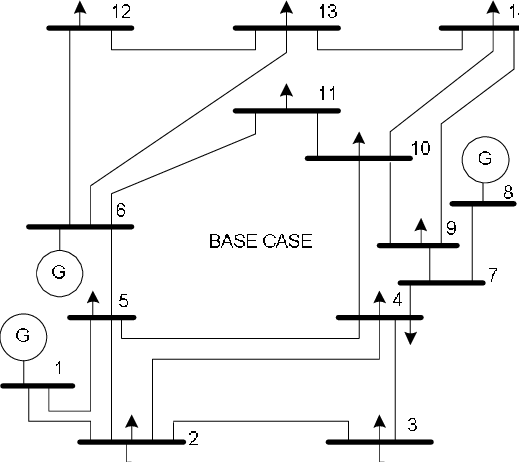

In [19]:
from IPython.display import Image
Image(filename='case2/case2.png')

**Importing Data and packages**

In [20]:
import pandas as pd
import networkx as nx
import numpy as np
import params as params
import matplotlib.pyplot as plt

from pypower.api import ppoption, runpf, case14

grid = case14()
ppopt = ppoption(PF_ALG=1)

line_data = pd.DataFrame(grid['branch'],
                     columns=['fbus', 'tbus', 'r', 'x', 'b', 'rateA', 'rateB', 'rateC', 'ratio', 'angle', 'status',
                              'angmin', 'angmax'])

bus_data = pd.DataFrame(grid['bus'],
                        columns=['bus_i', 'type', 'Pd', 'Qd', 'Gs', 'Bs', 'area', 'Vm', 'Va', 'baseKV', 'zone',
                              'Vmax', 'Vmin'])
bus_data = bus_data.astype({'bus_i': int, 'type': int})

gen_data = pd.DataFrame(grid['gen'], columns=['bus', 'Pg', 'Qg', 'Qmax', 'Qmin', 'Vg', 'mBase', 'status', 'Pmax',
     'Pmin', 'Pc1', 'Pc2', 'Qc1min', 'Qc1max', 'Qc2min', 'Qc2max', 'ramp_agc', 'ramp_10', 'ramp_30', 'ramp_q', 'apf'])
gen_data = gen_data.astype({'bus': int, 'status': int})

DERs = set(gen_data['bus'])
CLs = set(bus_data['bus_i'][bus_data['Pd'] > 20])

bus_data

,bus_i,type,Pd,Qd,Gs,Bs,area,Vm,Va,baseKV,zone,Vmax,Vmin
0,1,3,0.0,0.0,0.0,0.0,1.0,1.060,0.00,0.0,1.0,1.06,0.94
1,2,2,21.7,12.7,0.0,0.0,1.0,1.045,-4.98,0.0,1.0,1.06,0.94
2,3,2,94.2,19.0,0.0,0.0,1.0,1.010,-12.72,0.0,1.0,1.06,0.94
3,4,1,47.8,-3.9,0.0,0.0,1.0,1.019,-10.33,0.0,1.0,1.06,0.94
4,5,1,7.6,1.6,0.0,0.0,1.0,1.020,-8.78,0.0,1.0,1.06,0.94
5,6,2,11.2,7.5,0.0,0.0,1.0,1.070,-14.22,0.0,1.0,1.06,0.94
6,7,1,0.0,0.0,0.0,0.0,1.0,1.062,-13.37,0.0,1.0,1.06,0.94
7,8,2,0.0,0.0,0.0,0.0,1.0,1.090,-13.36,0.0,1.0,1.06,0.94
8,9,1,29.5,16.6,0.0,19.0,1.0,1.056,-14.94,0.0,1.0,1.06,0.94
9,10,1,9.0,5.8,0.0,0.0,1.0,1.051,-15.10,0.0,1.0,1.06,0.94



#### Modification to the standard 14 bus, 5 generator system:
**Tie Line switch is added between bus 9 and 1.**


In [22]:
line_data.loc[20] = [1,   9, 0.05403, 0.22304, 0.0492, 9900, 0, 0, 0,     0, 0, -360, 360]
line_data = line_data.astype({'fbus': int, 'tbus': int, 'status': int})
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
1,1,5,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
2,2,3,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
3,2,4,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
4,2,5,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
5,3,4,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
6,4,5,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
7,4,7,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1,-360.0,360.0
8,4,9,0.00000,0.55618,0.0000,9900.0,0.0,0.0,0.969,0.0,1,-360.0,360.0
9,5,6,0.00000,0.25202,0.0000,9900.0,0.0,0.0,0.932,0.0,1,-360.0,360.0


**Verifying normal operation of system after change using power flow calculation**

In [23]:
pf_res, success = runpf(grid)
print('power flow converged') if success else print('power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 2 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             14     Total Gen Capacity     772.4         -52.0 to 148.0
Generators         5     On-line Capacity       772.4         -52.0 to 148.0
Committed Gens     5     Generation (actual)    272.4              82.4
Loads             11     Load                   259.0              73.5
  Fixed           11       Fixed                259.0              73.5
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              21.2
Branches          21     Losses (I^2 * Z)        13.39             54.54
Transformers       3     Branc

**Adding edges and weights to graph**

In [24]:
from utilities import Utils
utils = Utils()
G, status = utils.make_graph(line_data)


**Calculating N-1 and N-2 branch resiliency of the network**

In [25]:
# Calculation of N-1 branch resiliency
edges = G.edges
res_list = []
net_cnt = 0
for u, v in edges:
    G.remove_edge(u, v)
    path_list = utils.find_path_list(G, CLs, DERs)
    FNs, raw_combs = utils.path_combinations(path_list)
    rsl = params.ratio_source_load(FNs, CLs, DERs)
    ops = params.switch_ops(FNs, status)
    cen = params.agg_centrality(FNs)
    obs = params.overlapping_branches(FNs)
    apl = params.avg_path_length(raw_combs)
    df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
    df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
    df = df.T
    df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
    df['resiliency'] = np.exp(-df['wtd_mean'])
    res_list.append(sum(df['resiliency']))
    net_cnt += df.shape[0]
    G.add_edge(u, v)

print('Resiliency of network considering N-1 branches: ', sum(res_list)/net_cnt)

# Calculation of N-2 branch Resiliency
res_list2 = []
net_cnt2 = 0
for i, (u, v) in enumerate(edges):
    G.remove_edge(u, v)
    for j, (l, r) in enumerate(edges):
        if i == j: continue
        G.remove_edge(l, r)
        path_list = utils.find_path_list(G, CLs, DERs)
        FNs, raw_combs = utils.path_combinations(path_list)
        rsl = params.ratio_source_load(FNs, CLs, DERs)
        ops = params.switch_ops(FNs, status)
        cen = params.agg_centrality(FNs)
        obs = params.overlapping_branches(FNs)
        apl = params.avg_path_length(raw_combs)
        df = pd.DataFrame(np.array([rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
        df.index = ['rsl', 'ops', 'cen', 'obs', 'apl']
        df = df.T
        df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
        df['resiliency'] = np.exp(-df['wtd_mean'])
        res_list2.append(sum(df['resiliency']))
        net_cnt2 += df.shape[0]
        G.add_edge(l, r)
    G.add_edge(u, v)

print('Resiliency of network considering N-2 branches: ', sum(res_list2)/net_cnt2)

    

Resiliency of network considering N-1 branches:  0.3657806824950371
Resiliency of network considering N-2 branches:  0.3672591922313811


**Visualizing modified network**

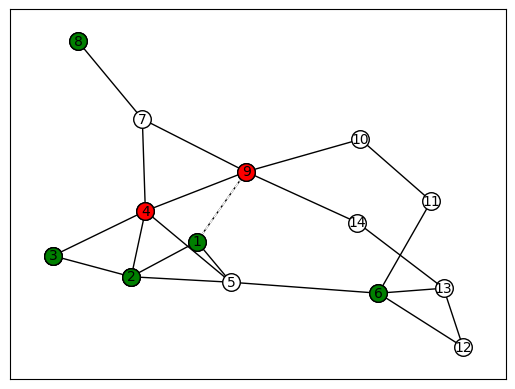

In [26]:
def plot_graph(G):
    pos = nx.layout.fruchterman_reingold_layout(G)
    options={
        'linewidths': 1,
        'edgecolors': 'black',
        'node_size': 160
    }
    nx.draw_networkx_nodes(G, pos, bus_data['bus_i'], node_color='white', **options)
    nx.draw_networkx_nodes(G, pos, CLs, node_color='red', **options)
    nx.draw_networkx_nodes(G, pos, DERs, node_color='green', **options)
    nx.draw_networkx_edges(G, pos, G.edges)
    nx.draw_networkx_edges(G, pos, [edge for edge in G.edges if status[edge] == 0], edge_color = 'white', style='dashed')
    nx.draw_networkx_labels(G, pos, labels={node: node for node in G.nodes()}, font_size=10)
    plt.show()
plot_graph(G)

#### Simulating Contingency:
**Generator at bus 6 and Switch in the line between bus (9 and 7), (9 and 4) is faulted resulting in islanding of critical load at bus 9.**

In [27]:
bus_data = bus_data.drop(5)
grid['bus'] = bus_data.values
gen_data = gen_data.drop(3)
grid['gen'] = gen_data.values
DERs.remove(6)
line_data = line_data[(line_data.tbus != 6) & (line_data.fbus != 6)]
line_data = line_data.drop([8, 14])
grid['branch'] = line_data.values
line_data

,fbus,tbus,r,x,b,rateA,rateB,rateC,ratio,angle,status,angmin,angmax
0,1,2,0.01938,0.05917,0.0528,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
1,1,5,0.05403,0.22304,0.0492,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
2,2,3,0.04699,0.19797,0.0438,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
3,2,4,0.05811,0.17632,0.0340,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
4,2,5,0.05695,0.17388,0.0346,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
5,3,4,0.06701,0.17103,0.0128,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
6,4,5,0.01335,0.04211,0.0000,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
7,4,7,0.00000,0.20912,0.0000,9900.0,0.0,0.0,0.978,0.0,1,-360.0,360.0
13,7,8,0.00000,0.17615,0.0000,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0
15,9,10,0.03181,0.08450,0.0000,9900.0,0.0,0.0,0.000,0.0,1,-360.0,360.0


**Visualizing the network after contingency**

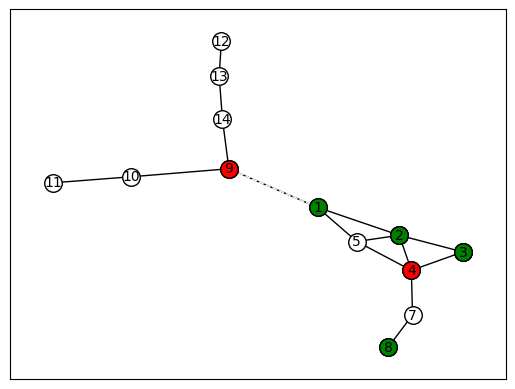

In [28]:
G, status = utils.make_graph(line_data)
plot_graph(G)

**Power flow analysis of the network after contingency**

In [29]:
try:
    pf_res, success = runpf(grid)
    print('Power flow converged') if success else print('Power flow did not converge')
except:
    print('Power flow did not converge')

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power did not converge in 10 iterations.

Did not converge (0.01 seconds)

|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             13     Total Gen Capacity     672.4         -46.0 to 124.0
Generators         4     On-line Capacity       672.4         -46.0 to 124.0
Committed Gens     4     Generation (actual)    177.2              25.5
Loads             10     Load                   247.8              66.0
  Fixed           10       Fixed                247.8              66.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              10.9
Branches          15     Losses (I^2 * Z)       644.86           1624.47
Transformers       1

### Finding Networks to restore the islanded critical node

**Finding all simple paths from each critical load to each source**

In [30]:
path_list = utils.find_path_list(G, CLs, DERs)

**All possible path combination calculation**

In [31]:
FNs, raw_combs = utils.path_combinations(path_list)

### Calculating parameters to measure resiliency of possible network

**Calculation of Parameter matrix**

In [32]:
id = range(len(FNs))
rsl = params.ratio_source_load(FNs, CLs, DERs)
ops = params.switch_ops(FNs, status)
cen = params.agg_centrality(FNs)
obs = params.overlapping_branches(FNs)
apl = params.avg_path_length(raw_combs)

df = pd.DataFrame(np.array([id, rsl, ops, cen, obs, apl]), columns=[f"FN{i}" for i in range(1, len(rsl)+1)])
df.index = ['id', 'rsl', 'ops', 'cen', 'obs', 'apl']
df = df.T
df = df.astype({'id': int})
print(df)

     id  rsl  ops  cen  obs  apl
FN1   0  2.0  1.0  0.5  0.0  1.5
FN2   1  1.0  1.0  0.3  0.0  1.5


**Calculation of weighted mean and resiliency**

In [33]:
df['wtd_mean'] = (df['rsl'] * 6 + df['ops'] * 3 + df['cen'] * 1 + df['obs'] * 5 + df['apl'] * 5)/20
df['resiliency'] = np.exp(-df['wtd_mean'])
print('Resiliency of network considering N-1 branches: ', sum(res_list)/net_cnt)
print('Resiliency of network considering N-2 branches: ', sum(res_list2)/net_cnt2, '\n')
print('Resiliency and parameters of feasible networks for case 2:', '\n')
print(df.sort_values('resiliency', ascending=False))

Resiliency of network considering N-1 branches:  0.3657806824950371
Resiliency of network considering N-2 branches:  0.3672591922313811 

Resiliency and parameters of feasible networks for case 2: 

     id  rsl  ops  cen  obs  apl  wtd_mean  resiliency
FN2   1  1.0  1.0  0.3  0.0  1.5      0.84    0.431711
FN1   0  2.0  1.0  0.5  0.0  1.5      1.15    0.316637


**Comparing line data before and after switching to the suggested network**

In [34]:
from IPython.core.display import display, HTML

def display_side_by_side(dfs:list, captions:list, tablespacing=5):
    """Display tables side by side to save vertical space
    Input:
        dfs: list of pandas.DataFrame
        captions: list of table captions
    """
    output = ""
    for (caption, df) in zip(captions, dfs):
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += tablespacing * "\xa0"
    display(HTML(output))

df1 = line_data[['fbus', 'tbus', 'r', 'x', 'status']]

for network in FNs:
    tmp_line = line_data
    for u, v in network:
        tmp_line.loc[(tmp_line.fbus == u) & (tmp_line.tbus == v), 'status'] = 1
        tmp_line.loc[(tmp_line.fbus == v) & (tmp_line.tbus == u), 'status'] = 1
    grid['branch'] = tmp_line.values
    pf_res, success = runpf(grid)
    if success:
        line_data = tmp_line
        break
df2 = line_data[['fbus', 'tbus', 'r', 'x', 'status']]

display_side_by_side([df1, df2], ['Line data after contingency', 'Line data after reconfiguration'])

PYPOWER Version 5.1.16, 05-March-2023 -- AC Power Flow (Newton)


Newton's method power flow converged in 5 iterations.

Converged in 0.01 seconds
|     System Summary                                                           |

How many?                How much?              P (MW)            Q (MVAr)
---------------------    -------------------  -------------  -----------------
Buses             13     Total Gen Capacity     672.4         -46.0 to 124.0
Generators         4     On-line Capacity       672.4         -46.0 to 124.0
Committed Gens     4     Generation (actual)    262.9              68.9
Loads             10     Load                   247.8              66.0
  Fixed           10       Fixed                247.8              66.0
  Dispatchable     0       Dispatchable           0.0 of 0.0        0.0
Shunts             1     Shunt (inj)             -0.0              16.5
Branches          15     Losses (I^2 * Z)        15.08             49.02
Transformers       1     Branc

/var/folders/ym/34_l97r95s734_tzqbrstc2r0000gn/T/ipykernel_33729/2888470551.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


,fbus,tbus,r,x,status
0,1,2,0.019380,0.059170,1
1,1,5,0.054030,0.223040,1
2,2,3,0.046990,0.197970,1
3,2,4,0.058110,0.176320,1
4,2,5,0.056950,0.173880,1
5,3,4,0.067010,0.171030,1
6,4,5,0.013350,0.042110,1
7,4,7,0.000000,0.209120,1
13,7,8,0.000000,0.176150,1
15,9,10,0.031810,0.084500,1


**Visualizing network having highest resiliency with operation feasibility**

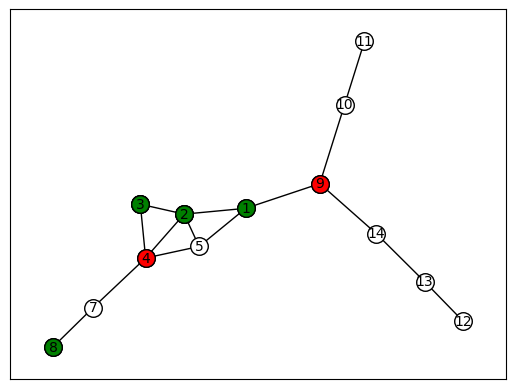

In [35]:
G, status = utils.make_graph(line_data)
plot_graph(G)

**Critical loads at bus 4 and 9 are successfully restored**